In [1]:
%matplotlib inline

# Assignment 1

**DUE: Sunday October 10 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Sanjay Shrikanth"
STUDENT_ID = "1718751"

## Problem 1 -  Use of List Comprehensions

### a) Use list comprehensions to create a list of all the indices of the 2's in the *number_list* you randomly generate (numbers between 1 and 10). (1 point)

In [3]:
from numpy.random import randint, seed

# Set the seed so the same random numbers will be generated.
seed(42)   # DON'T CHANGE

### YOUR CODE HERE ###
number_list = [randint(1,11) for num in range(25)]
indices_of_twos = [i for i,x in enumerate(number_list) if x == 2]

### b) Generate a list of the sum of the numbers that come up when a pair of dice is cast 22 times. Find the mean and standard deviation of these numbers. (3 points)

In [4]:
from numpy import mean, std

seed(117)   # DON'T CHANGE

### YOUR CODE HERE ###
sums = [randint(1, 7) + randint(1,7) for rolls in range(22)]
print('mean =', mean(sums), '    std =', std(sums))

mean = 6.681818181818182     std = 2.669463065459277


### c) Generate a list of the sum of the numbers that come up when a pair of dice is cast 100000 times. Find the mean and standard deviation of these numbers. (3 points)

In [5]:
seed(111)   # DON'T CHANGE

### YOUR CODE HERE ###
sums = [randint(1, 7) + randint(1,7) for rolls in range(100000)]
print('mean =', mean(sums), '    std =', std(sums))

mean = 7.02026     std = 2.4131285776767055


### d) Write down your conclusion from the observations you made in this question. (6 points)

I noticed that before performing any random number generation, the seed must be reset in order to simulate randomness as close as possible, but when the random number generation is run repeatedly, the same numbers appear in the list. Furthermore, even though the sampling size of the dice rolls in 1c were significantly higher (about 4500 times greater) than the sampling size in 1b, the mean and standard deviation were relatively close with a overall difference of < 0.5 in the means and < 0.3 in the standard deviations. The standard deviation of the rolls also decreased as the sampling size was increased. Based on this problem, list comprehension can be a powerful tool to easily create data lists that all share a similar property or calculation. This makes it useful for a variety of basic tasks, as seen through the different problems given in 1a and 1b/c. However, it suffers from readability due to its inline syntax and is difficult to use for complex operations.

## Problem 2 - Data Processing on Heart Disease Data

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we will be using is derived from the Heart database from the UCI Machine Learning Repository.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Read in the Data (2 points)
We are showing you a way to load data into your Colab file! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [7]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # Replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # Replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?

### YOUR CODE HERE ###
num_rows = len(data.index)
num_columns = len(data.columns)
print(num_rows, num_columns)
print(data.shape)

306 15
(306, 15)


Number of rows:  $306$

Number of columns:  $15$

### b) Using Dataframe functionalities, provide a brief description of the data. The description can include (but not limited to): number of features, data type of each feature, statistics on numerical features, potential data cleaning tasks that needs to be done based on the data. (8 points)  

In [10]:
### YOUR CODE HERE ###
num_features = len(data.columns)
print("Number of Features: ", num_features, "\n")  # number of features

print(data.dtypes, "\n")  # Data types of each feature

means = [(label, data[label].mean()) for label in data.columns if data[label].dtype != np.object_]
print("Means: {} \n".format(means))  # means for each feature with numerical values

medians = [(label, data[label].median()) for label in data.columns if data[label].dtype != np.object_]
print("Medians: {} \n".format(medians))  # means for each feature with numerical values

max_val = [(label, data[label].max()) for label in data.columns if data[label].dtype != np.object_]
print("Max Values for each Feature: {}\n".format(max_val))

min_val = max_val = [(label, data[label].min()) for label in data.columns if data[label].dtype != np.object_]
print("Min Values for each Feature: {}\n".format(min_val))

stddev = [(label, data[label].std()) for label in data.columns if data[label].dtype != np.object_]
print("Standard Deviation for each Feature: {}\n".format(stddev))

data.describe()

Number of Features:  15 

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object 

Means: [('Unnamed: 0', 153.5), ('Age', 54.92483660130719), ('Sex', 0.6797385620915033), ('RestBP', 139.26797385620915), ('Chol', 246.4281045751634), ('Fbs', 0.14705882352941177), ('RestECG', 0.9869281045751634), ('MaxHR', 150.0751633986928), ('ExAng', 0.32679738562091504), ('Oldpeak', 1.1130718954248366), ('Slope', 1.607843137254902), ('Ca', 0.6655629139072847)] 

Medians: [('Unnamed: 0', 153.5), ('Age', 55.5), ('Sex', 1.0), ('RestBP', 130.0), ('Chol', 240.5), ('Fbs', 0.0), ('RestECG', 0.5), ('MaxHR', 153.0), ('ExAng', 0.0), ('Oldpeak', 0.8), ('Slope', 2.0), ('Ca', 0.0)] 

Max Values for each Feature: [('Unnamed: 0', 306

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,302.000000
mean,153.500000,54.924837,0.679739,139.267974,246.428105,0.147059,0.986928,150.075163,0.326797,1.113072,1.607843,0.665563
std,88.478811,13.164193,0.467341,133.345625,52.139627,0.354745,0.994984,26.962832,0.469811,1.634994,0.619204,0.935142
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,77.250000,47.250000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,153.500000,55.500000,1.000000,130.000000,240.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,229.750000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Looking at the max and min values, there appears to be some distinct outliers in the data that are significantly higher or lower than the respective means and medians (*RestBP* and *Age*, for example). This indicates that some data cleaning is required to scrub or flesh out any of these extreme data points so that the standard deviation values can be more representative of the population. Since columns like *ChestPain* or *Thal* or *AHD* are object data types, none of these numerical statistics can be performed. This means that one-hot encoding may be required to quantify these features.

### c) Understanding the Data (12 points)

Look for a data description file whenever you explore a new dataset. This is a codebook (or text file) that tells you what each data item represents. The following link includes the data dictionary for this dataset: [Data Codebook](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [11]:
# Show the first few rows of the data.
### YOUR CODE HERE ###
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
# Print out the "info" of the dataset.
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. How many null values (missing values) exists in the data?

Each column is designated $306$ entries. Looking at the non-null count, Ca and Thal have $302$ and $304$ non-null entires respectively. So, the total number of null entries must be $(306 - 304) + (306 - 302) = $ **$6$**.

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

Use the code cell below to drop null values from the data. [hint: you can use dropna() function]

In [13]:
# Drop any rows with missing data
data.dropna()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,304,45,0,nontypical,2444,323,0,2,175,0,1.6,2,0.0,normal,No
304,305,222,1,asymptomatic,150,142,0,0,2,1,2.8,3,0.0,fixed,Yes


Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [14]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,302.000000
mean,153.500000,54.924837,0.679739,139.267974,246.428105,0.147059,0.986928,150.075163,0.326797,1.113072,1.607843,0.665563
std,88.478811,13.164193,0.467341,133.345625,52.139627,0.354745,0.994984,26.962832,0.469811,1.634994,0.619204,0.935142
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,77.250000,47.250000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,153.500000,55.500000,1.000000,130.000000,240.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,229.750000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Outliers are values far from the other data values (the distribution of the data), and are usually typos or other errors (such as measurement error). Looking at the data description above, do you spot any possible outliers in the data?

Some noticeable outliers include $\max$(*Age*) $= 222$, which is unsual because $222$ is a impossible value for human age, and $\max$(RestBP) $= 2444$, which is dangerously high when compared to the mean. Others include $\min$(*MaxHR*) $= 2$, which is extremely low for maximum heart rate, and $\max$(OldPeak) $= 21.2$ which compared to the quartiles is unusually high.

### d) Outlier Detection \& Elimination (15 points)
In this section, We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this: 

1) You'll make a new column called AgeZ to hold the z-transformed values of the Age column. 


2) Then, any AgeZ value that's less than -4 or more than 4 should be flagged as an outlier. 


3) Remove those entries from the dataset.

Remember that standardizing the data (or z-transform) is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.


In [15]:
data['AgeZ'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()

# Delete any rows for which AgeZ is greater than 4 or less than -4.

indexes = data[(data['AgeZ'] > 4) | (data['AgeZ'] < -4)].index
data.drop(indexes, inplace = True)

# Cleanup - delete the z-tranform column since we don't need it any more.
data = data.drop(columns=['AgeZ'])

# Let's take another look using the describe function.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,301.000000
mean,153.003279,54.377049,0.678689,139.232787,246.770492,0.147541,0.990164,150.560656,0.324590,1.107541,1.603279,0.667774
std,88.195823,9.041141,0.467748,133.563341,51.879603,0.355227,0.995005,25.632469,0.468991,1.634811,0.615044,0.935908
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,77.000000,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,153.000000,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,229.000000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,167.000000,1.000000,1.600000,2.000000,1.000000
max,306.000000,77.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Notice that now the Age column is much more reasonable. Report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 

**Before Outlier Removal:**
Mean: $54.924837$ \\
Standard Deviation: $13.164193$ \\
Q1: $47.250000$ \\
Q2: $55.500000$ \\
Q3: $61.000000$ \\

\\

**After Outlier Removal:**

Mean: $54.377049$ \\
Standard Deviation: $9.041141$ \\
Q1: $47.000000$ \\
Q2: $55.000000$ \\
Q3: $61.000000$ \\

Perform the same process to eliminate any extreme outliers (more than 4 standard deviations away from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [16]:
### YOUR CODE HERE ###
labels = ['RestBP', 'MaxHR', 'Oldpeak']

for l in labels:
  data["Zscore"] = (data[l] - data[l].mean()) / data[l].std()
  indices = data[(data['Zscore'] > 4) | (data['Zscore'] < -4)].index
  data.drop(indices, inplace = True)
  data = data.drop(columns=["Zscore"]) 

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,301.00000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,297.000000
mean,152.61794,54.428571,0.684385,131.634551,247.059801,0.149502,0.990033,149.594684,0.328904,1.020598,1.594684,0.666667
std,87.53211,9.054596,0.465534,17.569462,51.703350,0.357176,0.994937,22.944466,0.470597,1.125570,0.612513,0.929981
min,1.00000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,77.00000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,153.00000,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.00000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.00000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000


For the columns RestBP, MaxHR, and Oldpeak, report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 

**Before Outlier Removal:**

*RestBP*

Mean: $139.232787$ \\
Standard Deviation: $133.563341$ \\
Q1: $120.000000$ \\
Q2: $130.000000$ \\
Q3: $140.000000$ \\

\\

*MaxHR*

Mean: $150.560656$ \\
Standard Deviation: $25.632469$ \\
Q1: $133.000000$ \\
Q2: $153.000000$ \\
Q3: $167.000000$ \\

\\

*Oldpeak*

Mean: $1.107541$ \\
Standard Deviation: $1.634811$ \\
Q1: $0.000000$ \\
Q2: $0.800000$ \\
Q3: $1.600000$ \\

**After Outlier Removal:**

*RestBP*

Mean: $131.6345519$ \\
Standard Deviation: $17.569462$ \\
Q1: $120.000000$ \\
Q2: $130.000000$ \\
Q3: $140.000000$ \\

\\

*MaxHR*

Mean: $149.594684$ \\
Standard Deviation: $22.944466$ \\
Q1: $133.000000$ \\
Q2: $153.000000$ \\
Q3: $166.000000$ \\

\\

*Oldpeak*

Mean: $1.020598$ \\
Standard Deviation: $1.125570$ \\
Q1: $0.000000$ \\
Q2: $0.800000$ \\
Q3: $1.600000$ \\

### e) Data Visualization (4 points)

Sometimes it is useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

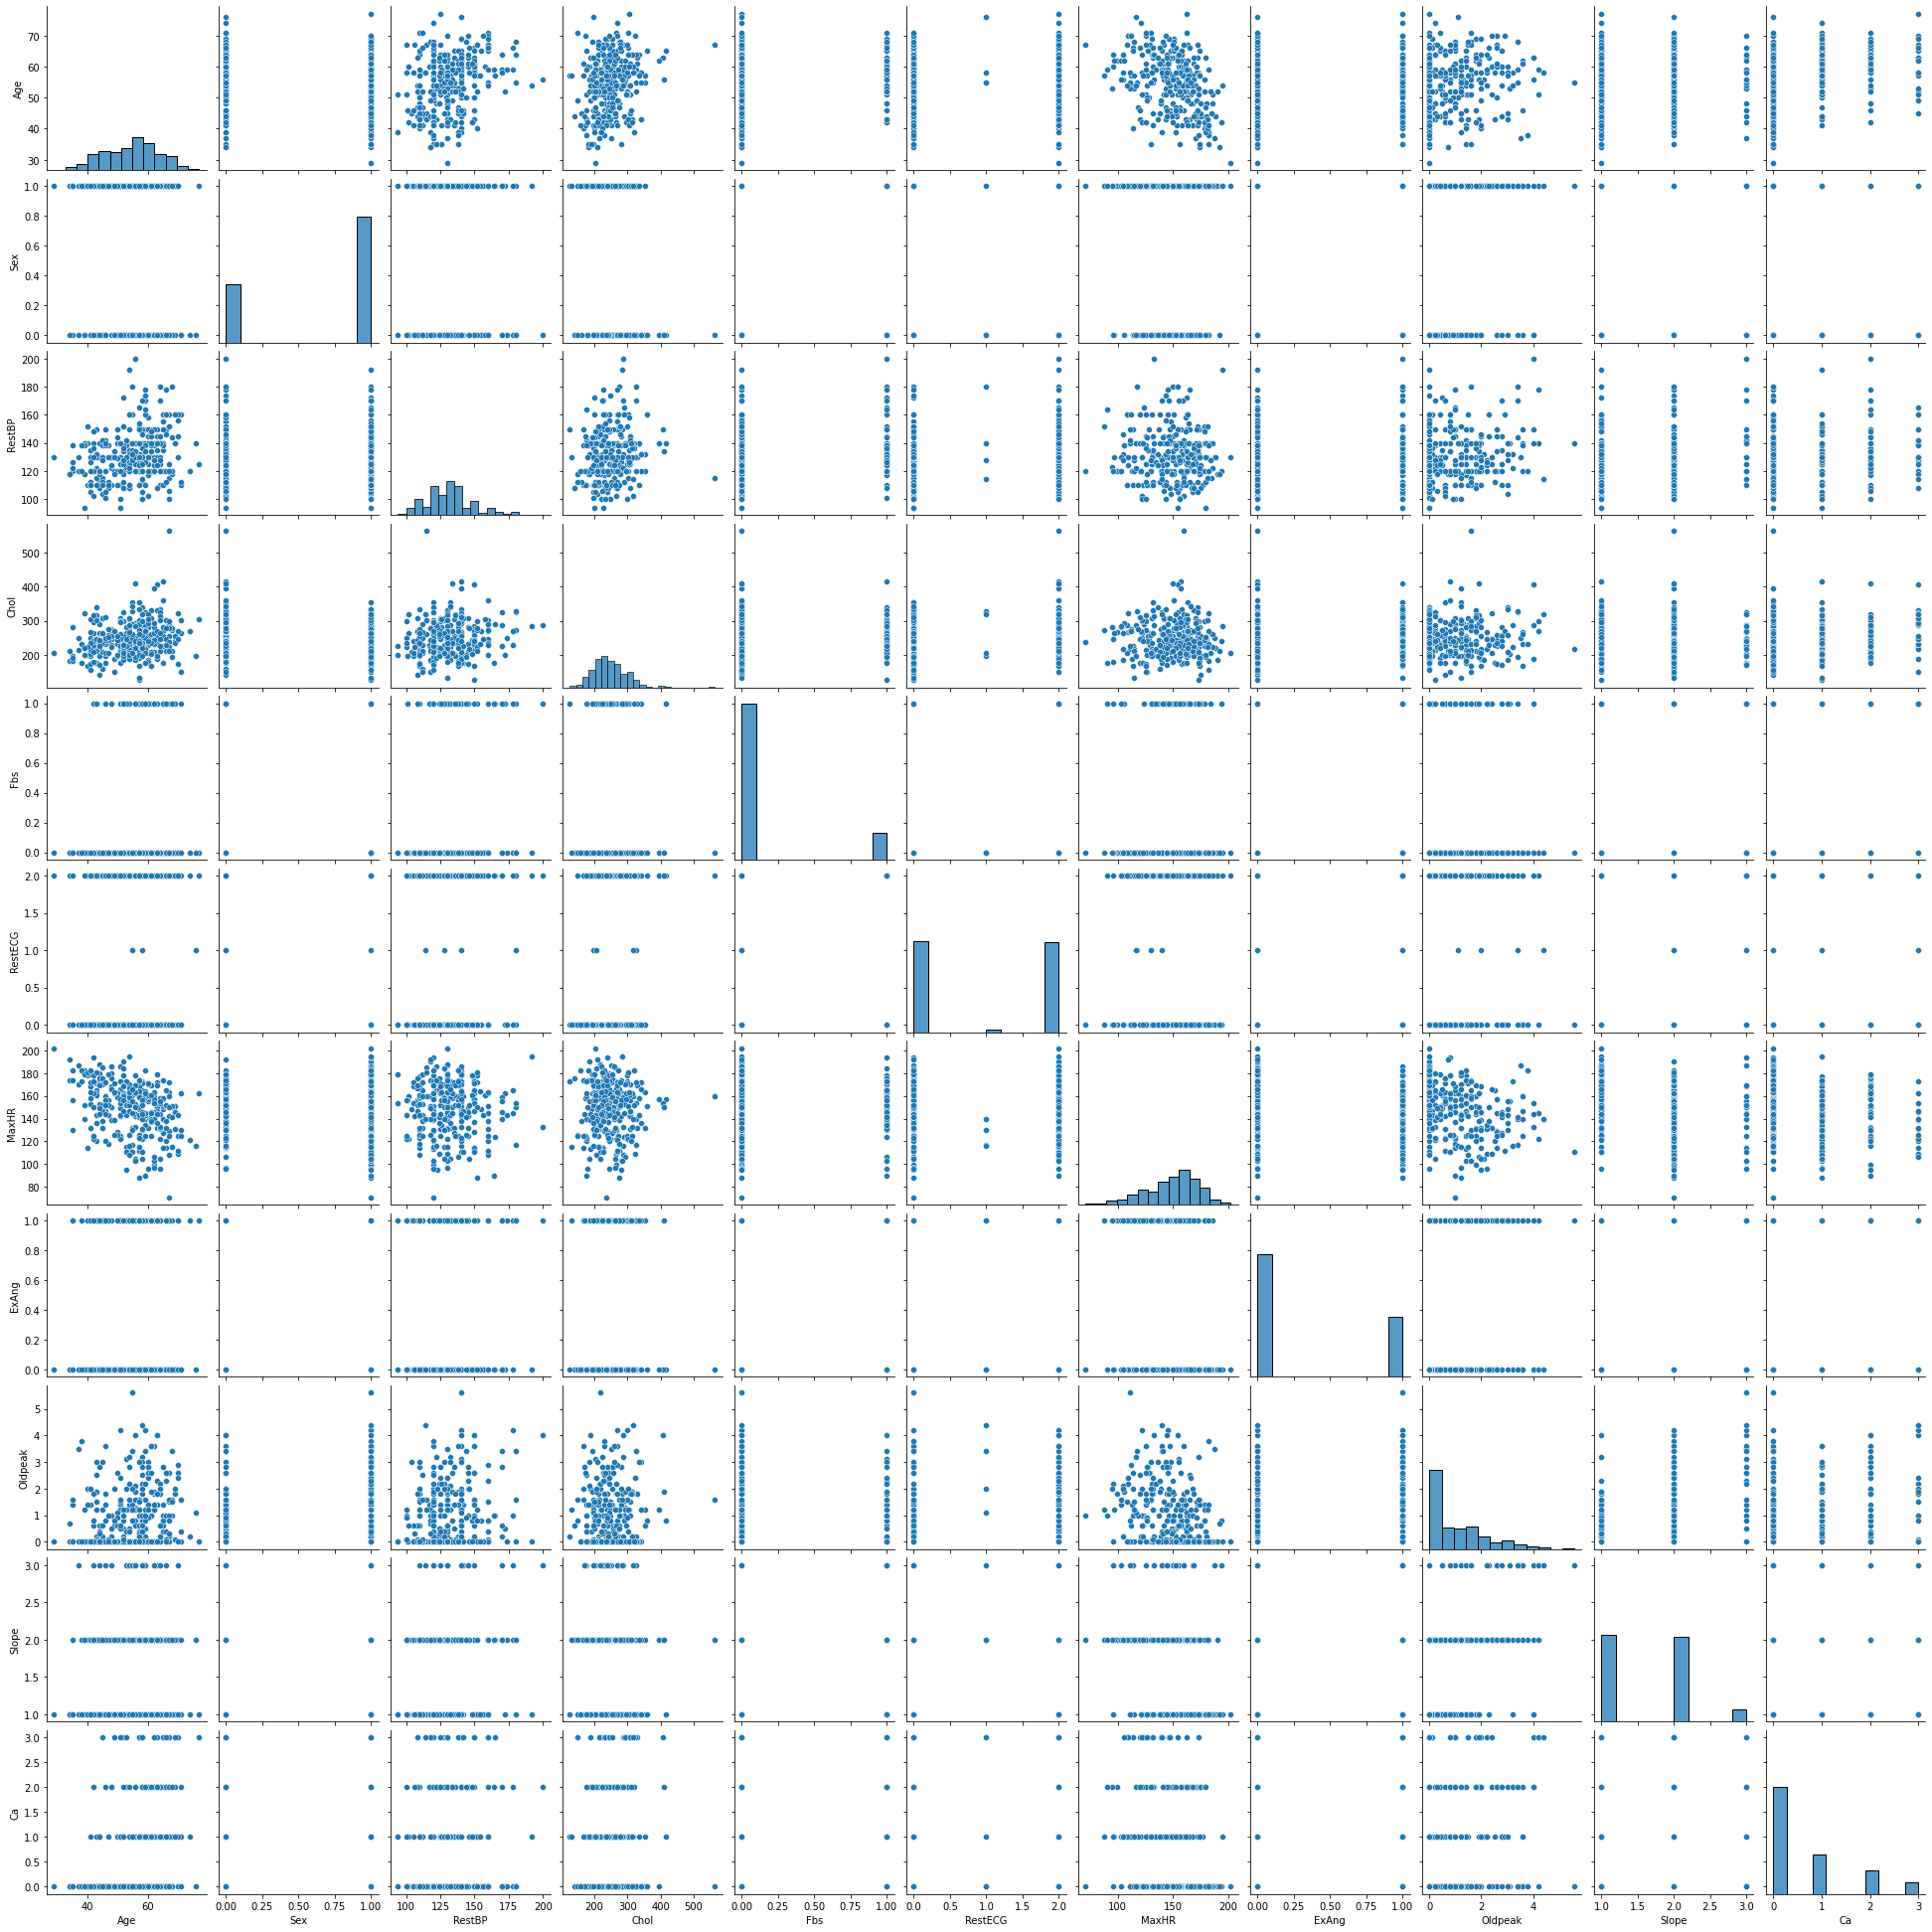

In [17]:
# Make a pairplot of all the variables (columns), excepting the first column.
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

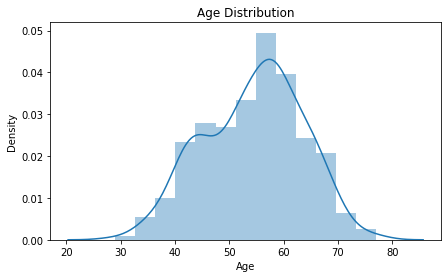

In [18]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

Plot the distribution of patient cholesterol levels.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholestrol Distribution')

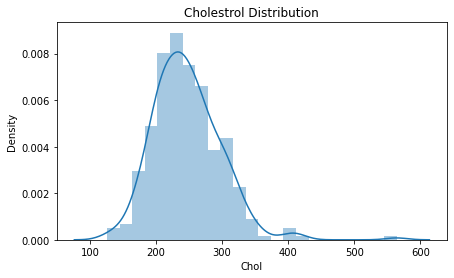

In [19]:
### YOUR CODE HERE ###
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Chol'])
plt.title('Cholestrol Distribution')

### f) Data Normalization (6 points)

We have already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

Let's create a new column ('NewAge') mapping all ages into the interval $[0,1]$.

In [20]:
# Create a new column, NewAge, to hold the normalized Age variable.
data['NewAge'] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())

# Take a look at the new age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
298    0.333333
299    0.812500
300    0.583333
301    0.583333
302    0.187500
Name: NewAge, Length: 301, dtype: float64

In [21]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

Map the minimum to 0 and maximum to 1 (in other words, normalize the column) for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [22]:
### YOUR CODE HERE ###

for l in ['RestBP', 'Chol', 'MaxHR']:
  data[l] = (data[l] - data[l].min()) / (data[l].max() - data[l].min())

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,301.00000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,297.000000
mean,152.61794,54.428571,0.684385,0.355043,0.276392,0.149502,0.990033,0.599959,0.328904,1.020598,1.594684,0.666667
std,87.53211,9.054596,0.465534,0.165750,0.118044,0.357176,0.994937,0.175149,0.470597,1.125570,0.612513,0.929981
min,1.00000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,77.00000,48.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000
50%,153.00000,56.000000,1.000000,0.339623,0.264840,0.000000,1.000000,0.625954,0.000000,0.800000,2.000000,0.000000
75%,228.00000,61.000000,1.000000,0.433962,0.340183,0.000000,2.000000,0.725191,1.000000,1.600000,2.000000,1.000000
max,303.00000,77.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.600000,3.000000,3.000000


### g) Converting Categorical Data to Numeric Values (3 points)

It is frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [23]:
### YOUR CODE HERE ###
data['AHD'] = data['AHD'].map({"Yes" : 1, "No" : 0})

### h) One-Hot-Encoding (10 points)

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the sklearn package.

Similar to what you have learned from the class exercise of lecture 2, add new columns for one-hot-encoding of 'Thal' column. Use 'Thal' as the prefix. Then drop the original column.

In [24]:
# Concatentate new one-hot encodings with the original dataframe.
data = pd.concat([data, pd.get_dummies(data['Thal'], prefix = 'Thal')], axis = 1)

# Now drop the original 'Thal' column (you don't need it anymore)
data = data.drop(columns=['Thal'])

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0


Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [25]:
### YOUR CODE HERE ###
data = pd.concat([data, pd.get_dummies(data['ChestPain'], prefix = 'ChestPain')], axis = 1)

data = data.drop(columns=['ChestPain'])

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0


### i) Feature Engineering (7 points)

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [26]:
### YOUR CODE HERE ###
data['AgeC'] = data['Age'] * data['Chol']

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AgeC
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1,15.390411
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0,24.474886
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0,15.755708
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0,10.474886
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0,7.301370


###  j) Balanced or Unbalanced Classes (8 points)

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of subjects were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Use the code cell below to see if the data is imbalanced or not and describe your observations in the next text cell.

0    163
1    138
Name: AHD, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AHD Distribution')

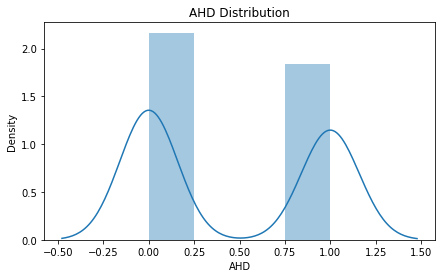

In [27]:
print(data['AHD'].value_counts(), "\n")


## PLOT of the Distrubition
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['AHD'])
plt.title('AHD Distribution')



When looking at the AHD value counts, it is apparent that there are a higher number (about $20\%$ more) of patients without AHD then there are patients with AHD. The distribution plot affirms this as the density of $0$ (or "No") is slightly above $2.0$ while the density of $1$ (or "Yes") is close to $1.75$, meaning that there is a higher number of patients without AHD. Since we want to have a dataset that equally represents both possible values that the feature predicts, this dataset is unbalanced. The current dataset under-represents patients that actually do have AHD, so it would make the model innacurate as the data is slighly skewed towards people without AHD.

### k) Outline potential solutions to balance the data in the next cell, and implement one of those techniques in the code cell that follows. By plotting the distribution or in some other way, indicate how your technique helped create a more balanced dataset. (12 points) 

One way to balance the data would be to **down-sampling** or *randomly* remove data from the dominating class. To do this, randomly select rows of the dominating class, which in this case are the patients without AHD, and eliminate them until the number of patients with AHD equal the number of patients without. This preserves the integrity of the minority class, or the patients with AHD, while removing data from the majority class to achieve a balanced set. By doing this, the dataset would naturally balance itself, but it is possible that important data from the dominating can be omitted, possibly affecting other columns' distributions. (**Implemented this technique in the code cells below**)

Another technique would be **up-sampling**, or adding data in the minority class via new samples or duplicating randomly-sampled rows. New data or samples would be required to implement this technique or simply duplicate parts of the minority class. This would over-sample the minority class and make it more represented in the model without eliminating data. By adding these samples, it will add more rows to the minority class, balancing out the overall dataset. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AHD Distribution')

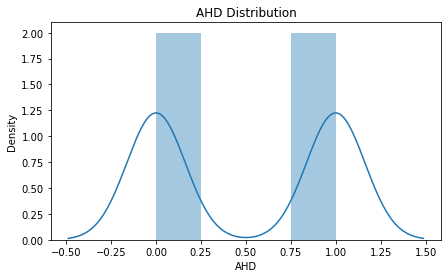

In [28]:
### YOUR CODE HERE ###
yes_count, no_count = data['AHD'].value_counts()

### UNDER-SAMPLING BY RANDOMLY REMOVING ROWS OF PATIENTS WITHOUT AHD
diff = yes_count - no_count
indexes = data[data['AHD'] == 0].sample(n = diff).index
data.drop(indexes, inplace = True)

plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['AHD'])
plt.title('AHD Distribution')